In [8]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
os.chdir(r"D:\Work\4. BOSCH\EMY-050\Simulation\VSI CCM")

In [10]:
from scipy.interpolate import interp1d, UnivariateSpline
def spline(df,x,y,new_range):
    spline_function = UnivariateSpline(df[x], df[y])
    big_range = np.linspace(df.loc[0,x],df.loc[df.shape[0]-1,x],new_range)
    y_spline = spline_function(big_range)
    return big_range, y_spline

class MOSFET:
    def __init__(self):
        # Initialize the on_25 and off_25 members as lists of lists
        self.current = [0,1,3,5,10,20,30,40,50,60]
        self.on_25 = [[], [], []]
        self.off_25 = [[], [], []]
        self.on_150 = [[], [], []]
        self.off_150 = [[], [], []]
        
    def plot_curve(self, y_values):
        plt.plot(self.current,y_values)
    def interpolate(self, y_values, x):
        """
        Interpolate the y value corresponding to x given a list of x_values and y_values.
        
        :param x_values: List of x coordinates (must be sorted).
        :param y_values: List of y coordinates corresponding to x_values.
        :param x: The x value to interpolate.
        :return: The interpolated y value.
        """
        x_values = self.current
        if not x_values or not y_values or len(x_values) != len(y_values):
            raise ValueError("x_values and y_values must be non-empty and of the same length.")

        # Perform linear interpolation
        for i in range(1, len(x_values)):
            if x_values[i-1] <= x <= x_values[i]:
                # Linear interpolation formula: y = y0 + (x - x0) * (y1 - y0) / (x1 - x0)
                x0, y0 = x_values[i-1], y_values[i-1]
                x1, y1 = x_values[i], y_values[i]
                y = y0 + (x - x0) * (y1 - y0) / (x1 - x0)
                return y

        # If x is outside the range of x_values, raise an error or handle as needed
        raise ValueError("x value is outside the interpolation range.")

In [11]:
PMTX04 = MOSFET()
PMTW04 = MOSFET()

PMTX04.on_25[0] = [23.33,24.88,27.61,30.31,37.17,52.10,68.71,86.96,106.90,128.48] # 300 V
PMTX04.on_25[1] = [69.64,71.11,82.58,90.75,112.06,157.45,207.43,262.16,320.99,384.85] # 600 V
PMTX04.on_25[2] = [135.77,144.35,163.44,178.04,221.15,314.21,415.29,524.81,642.09,768.92] # 900 V

PMTX04.on_150[0] = [22.90,24.41,27.10,29.84,36.72,52.16,70.08,90.38,112.93,137.72] # 300 V
PMTX04.on_150[1] = [68.85,73.24,81.39,89.40,110.08,155.08,204.93,259.42,319.35,383.84] # 600 V
PMTX04.on_150[2] = [134.62,143.08,159.55,175.82,217.44,307.50,405.77,512.74,628.56,752.06] #900 V

PMTX04.off_25[0] = [8.12e-5,4.05e-4,5.94e-3,1.88e-2,9.98e-2,8.30e-1,4.51e0,1.30e1,2.54e1,4.08e1] # 300 V
PMTX04.off_25[1] = [8.11e-5,4.05e-4,5.94e-3,1.88e-2,9.9e-2,8.48e-1,1.07e1,3.41e1,6.32e1,9.63e1] # 600 V
PMTX04.off_25[2] = [8.11e-5,4.05e-4,5.94e-3,1.88e-2,9.99e-2,8.58e-1,2.39e1,7.27e1,1.3e2,1.92e2] # 900 V

PMTX04.off_150[0] =[0.000146,0.000778,0.011149,0.03475,0.169,1.211,5.792,15.47,28.97,45.51] # 300 V
PMTX04.off_150[1] =[0.000146,0.000778,0.011145,0.034737,0.1688,1.245,14.758,40.75,71.94,106.97] # 600 V
PMTX04.off_150[2] =[0.000146,0.000777,0.0111,0.03473,0.1687,1.274,32.57,84.81,144.47,209.26] # 900 V

PMTW04.on_25[0] = [23.33,24.88,27.61,30.31,37.17,52.10,68.71,86.96,106.90,128.48] # 200 V
PMTW04.on_25[1] = [69.64,71.11,82.58,90.75,112.06,157.45,207.43,262.16,320.99,384.85] # 400 V
PMTW04.on_25[2] = [135.77,144.35,163.44,178.04,221.15,314.21,415.29,524.81,642.09,768.92] # 600 V

PMTW04.on_150[0] = [] # 200 V
PMTW04.on_150[1] = [43.58,46.77,52.81,58.79,74.16,107.35,144.21,184.76,229.02,277.19] # 400 V
PMTW04.on_150[2] = [] # 600 V

PMTW04.off_25[0] = [8.12e-5,4.05e-4,5.94e-3,1.88e-2,9.98e-2,8.30e-1,4.51e0,1.30e1,2.54e1,4.08e1] # 200 V
PMTW04.off_25[1] = [8.11e-5,4.05e-4,5.94e-3,1.88e-2,9.9e-2,8.48e-1,1.07e1,3.41e1,6.32e1,9.63e1] # 400 V
PMTW04.off_25[2] = [8.11e-5,4.05e-4,5.94e-3,1.88e-2,9.99e-2,8.58e-1,2.39e1,7.27e1,1.3e2,1.92e2] # 600 V

PMTW04.off_150[0] =[] # 200 V
PMTW04.off_150[1] =[0.000434,0.000195,0.00585,0.024251,0.1475,2.4,18.06,39.97,65.57,94.33] # 400 V
PMTW04.off_150[2] =[] # 600 V

In [12]:
RdsOn_H = 62.2e-3
RdsOn_N = 38.7e-3

In [18]:
new_range = 100
CCM = pd.read_csv("ccm_averages_plecs.csv")
CCM2x = pd.read_csv("2x_CCM_averages.csv")
TCM = pd.read_csv("s_tcm_averages_plecs.csv")
TCM2x = pd.read_csv("2x_s_tcm_averages_plecs.csv")
BTCM = pd.read_csv("B_TCM_averages_plecs.csv")
BTCM2x = pd.read_csv("2x_btcm_averages_plecs.csv")
T_TCM = pd.read_csv("T_TCM_averages_plecs.csv")
T_TCM2x = pd.read_csv("2x_T_TCM_averages_plecs.csv")

df = pd.DataFrame()
df['P_arr'],df['rms_H']     = spline(BTCM2x,'P_arr','rms',new_range)
#df['P_arr'],df['rms_N']     = spline(T_TCM2x,'P_arr','rms_N',new_range)
df['P_arr'],df['sw_rms_H']  = spline(BTCM2x,'P_arr','sw_rms',new_range)
#df['P_arr'],df['sw_rms_N']  = spline(T_TCM2x,'P_arr','sw_rms_N',new_range)

df.to_csv('BTCM2x_interp.csv',index=False)

In [19]:
BTCM2x = BTCM2x.rename(columns={'sw_rms_H':'sw_rms'})
BTCM2x.to_csv('BTCM2x_interp.csv',index=False)

In [20]:
CCM = pd.read_csv("CCM_averages.csv")
CCM2x = pd.read_csv("2x_CCM_averages.csv")

TCM = pd.read_csv("s_tcm_averages_plecs.csv")
TCM2x = pd.read_csv("2x_s_tcm_averages_plecs.csv")

BTCM = pd.read_csv("B_TCM_averages_plecs.csv")
BTCM2x = pd.read_csv("2x_btcm_averages_plecs.csv")

T_TCM = pd.read_csv("T_TCM_averages_plecs.csv")
T_TCM2x = pd.read_csv("2x_T_TCM_averages_plecs.csv")

CCM = pd.read_csv("CCM_interp.csv")
CCM2x = pd.read_csv("CCM2x_interp.csv")

TCM = pd.read_csv("TCM_interp.csv")
TCM2x = pd.read_csv("TCM2x_interp.csv")

BTCM = pd.read_csv("BTCM_interp.csv")
BTCM2x = pd.read_csv("BTCM2x_interp.csv")

T_TCM = pd.read_csv("T_TCM_interp.csv")
T_TCM2x = pd.read_csv("T_TCM2x_interp.csv")

TCM["Cond_H"] = TCM["rms"]**2 * RdsOn_H
TCM["Cond_T"] = TCM["Cond_H"] * 4

TCM2x["Cond_H"] = TCM2x["rms"]**2 * RdsOn_H
TCM2x["Cond_T"] = TCM2x["Cond_H"] * 8

BTCM["Cond_H"] = BTCM["rms"]**2 * RdsOn_H
BTCM["Cond_T"] = BTCM["Cond_H"] * 4

BTCM2x["Cond_H"] = BTCM2x["rms"]**2 * RdsOn_H
BTCM2x["Cond_T"] = BTCM2x["Cond_H"] * 8

CCM["Cond_H"] = CCM["rms_H"]**2 * RdsOn_H
CCM["Cond_N"] = CCM["rms_N"]**2 * RdsOn_N
CCM["Cond_T"] = CCM["Cond_H"]*2 + CCM["Cond_N"]*2

CCM2x["Cond_H"] = CCM2x["rms_H"]**2 * RdsOn_H
CCM2x["Cond_N"] = CCM2x["rms_N"]**2 * RdsOn_N
CCM2x["Cond_T"] = CCM2x["Cond_H"]*4 + CCM["Cond_N"]*4

T_TCM["Cond_H"] = T_TCM["rms_H"]**2 * RdsOn_H
T_TCM["Cond_N"] = T_TCM["rms_N"]**2 * RdsOn_N
T_TCM["Cond_T"] = T_TCM["Cond_H"]*2 + T_TCM["Cond_N"]*2

T_TCM2x["Cond_H"] = T_TCM2x["rms_H"]**2 * RdsOn_H
T_TCM2x["Cond_N"] = T_TCM2x["rms_N"]**2 * RdsOn_N
T_TCM2x["Cond_T"] = T_TCM2x["Cond_H"]*4 + T_TCM["Cond_N"]*4
TCM.head()

,P_arr,rms,sw_rms,Cond_H,Cond_T
0,100.000000,5.566716,3.883877,1.927474,7.709895
1,135.353535,5.566236,3.862542,1.927141,7.708566
2,170.707071,5.566446,3.841671,1.927287,7.709149
3,206.060606,5.567341,3.821262,1.927907,7.711627
4,241.414141,5.568915,3.801313,1.928997,7.715987


## RMS Currents & Conduction Losses

### Plotting

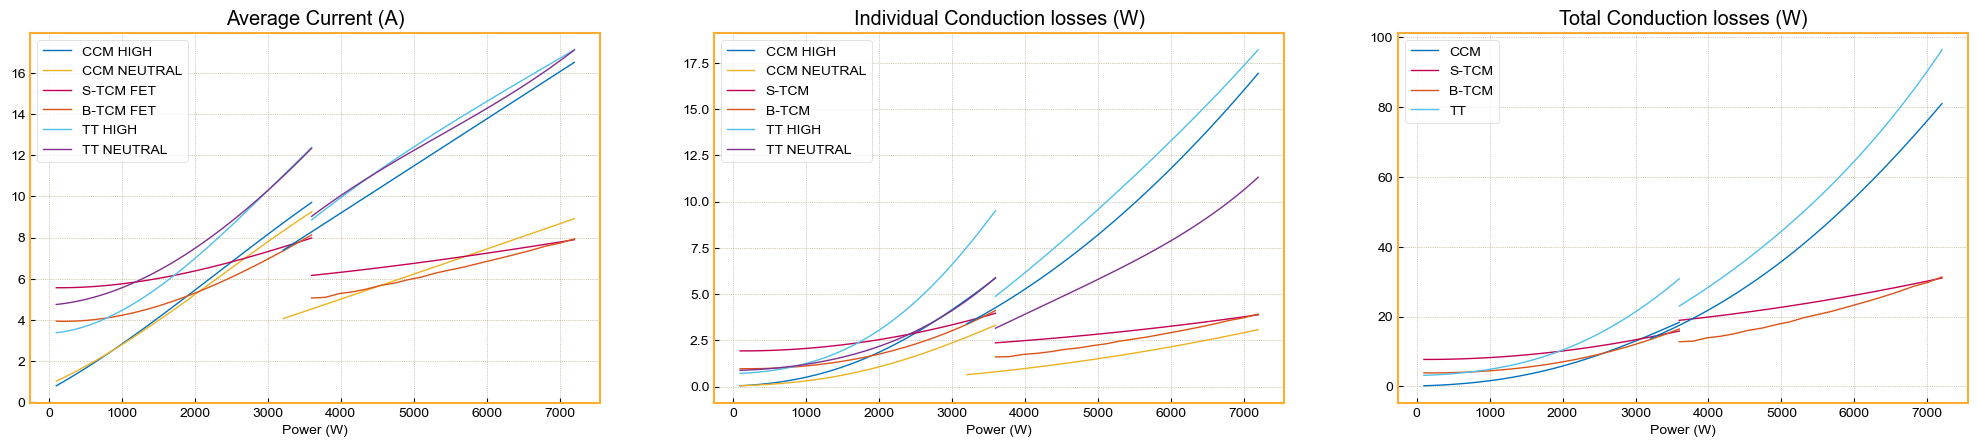

In [21]:
from matplotlib import rcParams
# Set the font properties
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']  # Replace 'Arial' with your desired font
plt.rcParams['svg.fonttype'] = 'none'
figwidth = 25
plt.style.use('bmh')
fig,p=plt.subplots(1,3)
fig.set_figwidth(figwidth)

p[0].set_title('Average Current (A)')
p[1].set_title('Individual Conduction losses (W)')
p[2].set_title('Total Conduction losses (W)')

CCM.plot(ax=p[0],x="P_arr",y=["rms_H","rms_N"],label=['CCM HIGH','CCM NEUTRAL'])
TCM.plot(ax=p[0],x="P_arr",y="rms",label='S-TCM FET')
BTCM.plot(ax=p[0],x="P_arr",y="rms",label='B-TCM FET',color='C5')
CCM2x.plot(ax=p[0],x="P_arr",y=["rms_H","rms_N"],label=['2x CCM HIGH','2x CCM NEUTRAL'],color=['C0','C1'],legend=False)
TCM2x.plot(ax=p[0],x="P_arr",y="rms",label='S-TCM FET',color='C2',legend=False)
BTCM2x.plot(ax=p[0],x="P_arr",y="rms",label='B-TCM FET',color='C5',legend=False)
T_TCM.plot(ax=p[0],x="P_arr",y=["rms_H","rms_N"],label=['TT HIGH','TT NEUTRAL'],color=['C3','C4'])
T_TCM2x.plot(ax=p[0],x="P_arr",y=["rms_H","rms_N"],label=['TT HIGH','TT NEUTRAL'],legend=False,color=['C3','C4'])

CCM.plot(ax=p[1],x="P_arr",y=["Cond_H","Cond_N"],label=['CCM HIGH','CCM NEUTRAL'])
TCM.plot(ax=p[1],x="P_arr",y=["Cond_H"],label=['S-TCM'])
BTCM.plot(ax=p[1],x="P_arr",y=["Cond_H"],label=['B-TCM'],color='C5')
CCM2x.plot(ax=p[1],x="P_arr",y=["Cond_H","Cond_N"],label=['2x CCM HIGH','2x CCM NEUTRAL'],color=['C0','C1'],legend=False)
TCM2x.plot(ax=p[1],x="P_arr",y=["Cond_H"],label=['S-TCM'],color='C2',legend=False)
BTCM2x.plot(ax=p[1],x="P_arr",y=["Cond_H"],label=['S-TCM'],color='C5',legend=False)
T_TCM.plot(ax=p[1],x="P_arr",y=["Cond_H","Cond_N"],label=['TT HIGH','TT NEUTRAL'],color=['C3','C4'])
T_TCM2x.plot(ax=p[1],x="P_arr",y=["Cond_H","Cond_N"],label=['TT HIGH','TT NEUTRAL'],legend=False,color=['C3','C4'])

CCM.plot(ax=p[2],x="P_arr",y=["Cond_T"],label=["CCM"])
TCM.plot(ax=p[2],x="P_arr",y=["Cond_T"],label=["S-TCM"],color='C2')
TCM2x.plot(ax=p[2],x="P_arr",y=["Cond_T"],label=["S-TCM"],color='C2',legend=False)
BTCM2x.plot(ax=p[2],x="P_arr",y=["Cond_T"],label=["S-TCM"],color='C5',legend=False)
BTCM.plot(ax=p[2],x="P_arr",y=["Cond_T"],label=["B-TCM"],color='C5')
CCM2x.plot(ax=p[2],x="P_arr",y=["Cond_T"],label=["2x CCM"],color=['C0'],legend=False)
T_TCM.plot(ax=p[2],x="P_arr",y=["Cond_T"],label=["TT"],color=['C3'])
T_TCM2x.plot(ax=p[2],x="P_arr",y=["Cond_T"],label=["TT"],legend=False,color=['C3'])

[ax.set_xlabel("Power (W)") for ax in p]
fig.savefig("conduction.svg")

##  RMS Currents & Switching Losses

###  Calculation

In [22]:
msk = CCM['sw_rms_H'] < 0
CCM.loc[msk,'sw_rms_H'] = 0

In [23]:
BTCM['f_rms'] = 150e3
BTCM2x['f_rms'] = 150e3
TCM['f_rms'] = 150e3
TCM2x['f_rms'] = 150e3

CCM["Sw_on_N"] =  [75e3 * PMTW04.interpolate(PMTW04.on_150[1],val) * 1e-6 for val in CCM['sw_rms_N'].values]
CCM["Sw_off_N"] = [75e3 * PMTW04.interpolate(PMTW04.off_150[1],val) * 1e-6 for val in CCM['sw_rms_N'].values]
CCM["Sw_on_H"] =  [75e3 * PMTX04.interpolate(PMTX04.on_150[2],val) * 1e-6 for val in CCM['sw_rms_H'].values]
CCM["Sw_off_H"] = [75e3 * PMTX04.interpolate(PMTX04.off_150[2],val) * 1e-6 for val in CCM['sw_rms_H'].values]

CCM2x["Sw_on_N"] =  [75e3 * PMTW04.interpolate(PMTW04.on_150[1],val) * 1e-6 for val in CCM2x['sw_rms_N'].values]
CCM2x["Sw_off_N"] = [75e3 * PMTW04.interpolate(PMTW04.off_150[1],val) * 1e-6 for val in CCM2x['sw_rms_N'].values]
CCM2x["Sw_on_H"] =  [75e3 * PMTX04.interpolate(PMTX04.on_150[2],val) * 1e-6 for val in CCM2x['sw_rms_H'].values]
CCM2x["Sw_off_H"] = [75e3 * PMTX04.interpolate(PMTX04.off_150[2],val) * 1e-6 for val in CCM2x['sw_rms_H'].values]

CCM["Sw_T"] = CCM['Sw_on_N']*2 + CCM['Sw_off_N']*2 + CCM['Sw_on_H']*2 + CCM['Sw_off_H']*2
CCM2x["Sw_T"] = CCM2x['Sw_on_N']*4 + CCM2x['Sw_off_N']*4 + CCM2x['Sw_on_H']*4 + CCM2x['Sw_off_H']*4
TCM["Sw_T"] = [4*TCM.iloc[i]["f_rms"] * PMTX04.interpolate(PMTX04.off_150[2],val) * 1e-6 for i,val in enumerate(TCM['sw_rms'].values)]
TCM2x["Sw_T"] = [8*TCM2x.iloc[i]["f_rms"] * PMTX04.interpolate(PMTX04.off_150[2],val) * 1e-6 for i,val in enumerate(TCM2x['sw_rms'].values)]
BTCM["Sw_T"] = [4*BTCM.iloc[i]["f_rms"] * PMTX04.interpolate(PMTX04.off_150[2],val) * 1e-6 for i,val in enumerate(BTCM['sw_rms'].values)]
BTCM2x["Sw_T"] = [8*BTCM2x.iloc[i]["f_rms"] * PMTX04.interpolate(PMTX04.off_150[2],val) * 1e-6 for i,val in enumerate(BTCM2x['sw_rms'].values)]

T_TCM["Sw_off_N"] = [75e3 * PMTW04.interpolate(PMTW04.off_150[1],val) * 1e-6 for val in T_TCM['sw_rms_N'].values]
T_TCM["Sw_off_H"] = [75e3 * PMTX04.interpolate(PMTX04.off_150[2],val) * 1e-6 for val in T_TCM['sw_rms_H'].values]
T_TCM["Sw_T"] = T_TCM['Sw_off_N']*2 + T_TCM['Sw_off_H']*2

T_TCM2x["Sw_off_N"] = [75e3 * PMTW04.interpolate(PMTW04.off_150[1],val) * 1e-6 for val in T_TCM2x['sw_rms_N'].values]
T_TCM2x["Sw_off_H"] = [75e3 * PMTX04.interpolate(PMTX04.off_150[2],val) * 1e-6 for val in T_TCM2x['sw_rms_H'].values]
T_TCM2x["Sw_T"] = T_TCM2x['Sw_off_N']*4 + T_TCM2x['Sw_off_H']*4

### Plotting

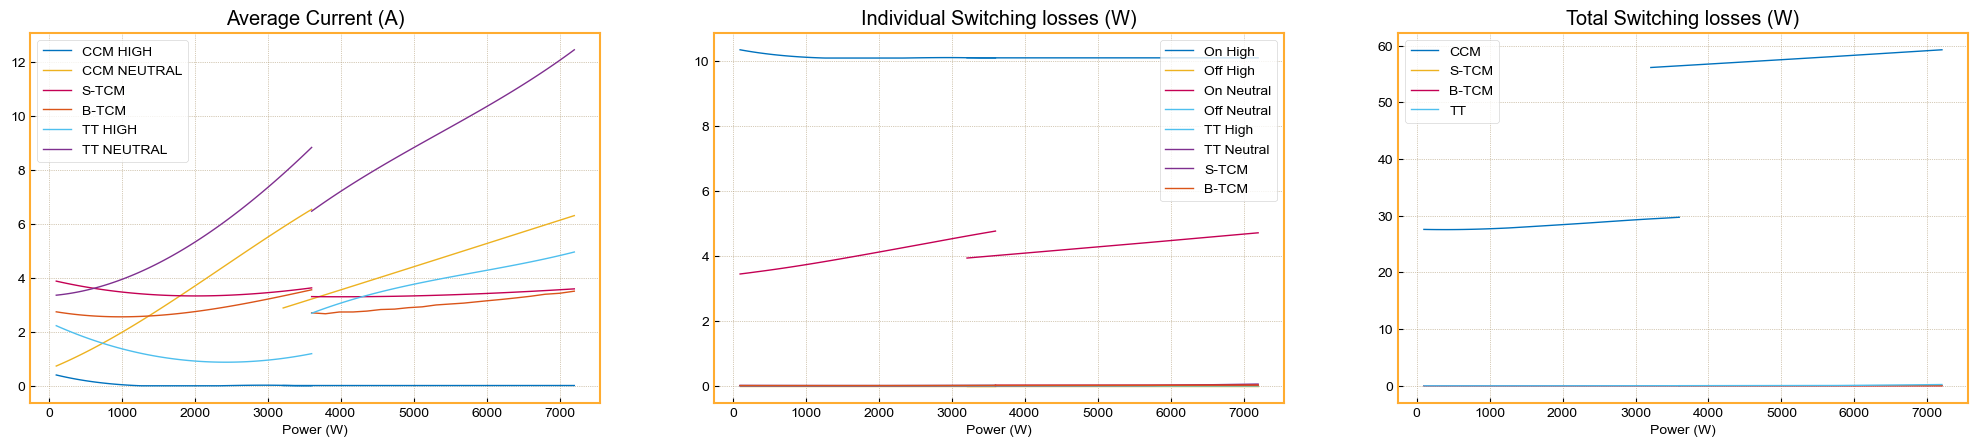

In [24]:
plt.style.use('bmh')
fig,p=plt.subplots(1,3)
fig.set_figwidth(figwidth)

p[0].set_title('Average Current (A)')
p[1].set_title('Individual Switching losses (W)')
p[2].set_title('Total Switching losses (W)')

CCM.plot(ax=p[0],x="P_arr",y=["sw_rms_H","sw_rms_N"],label=['CCM HIGH','CCM NEUTRAL'])
CCM2x.plot(ax=p[0],x="P_arr",y=["sw_rms_H","sw_rms_N"],label=['2x CCM HIGH','2x CCM NEUTRAL'],color=['C0','C1'],legend=False)
TCM.plot(ax=p[0],x="P_arr",y=["sw_rms"],label=['S-TCM'])
TCM2x.plot(ax=p[0],x="P_arr",y=["sw_rms"],label=['S-TCM'],color='C2',legend=False)
BTCM.plot(ax=p[0],x="P_arr",y=["sw_rms"],label=['B-TCM'],color='C5')
BTCM2x.plot(ax=p[0],x="P_arr",y=["sw_rms"],label=['B-TCM'],color='C5',legend=False)
T_TCM.plot(ax=p[0],x="P_arr",y=["sw_rms_H","sw_rms_N"],label=['TT HIGH','TT NEUTRAL'],color=['C3','C4'])
T_TCM2x.plot(ax=p[0],x="P_arr",y=["sw_rms_H","sw_rms_N"],label=['TT HIGH','TT NEUTRAL'],color=['C3','C4'],legend=False)

CCM.plot(ax=p[1],x="P_arr",y=["Sw_on_H","Sw_off_H"],label=['On High','Off High'])
CCM.plot(ax=p[1],x="P_arr",y=["Sw_on_N","Sw_off_N"],label=['On Neutral','Off Neutral'])
CCM2x.plot(ax=p[1],x="P_arr",y=["Sw_on_H","Sw_off_H"],label=['On High','Off High'],color=['C0','C1'],legend=False)
CCM2x.plot(ax=p[1],x="P_arr",y=["Sw_on_N","Sw_off_N"],label=['On Neutral','Off Neutral'],color=['C2','C3'],legend=False)
T_TCM.plot(ax=p[1],x="P_arr",y=["Sw_off_H","Sw_off_N"],label=['TT High','TT Neutral'],color=['C3','C4'])
T_TCM2x.plot(ax=p[1],x="P_arr",y=["Sw_off_H","Sw_off_N"],label=['TT High','TT Neutral'],color=['C3','C4'],legend=False)

TCM.plot(ax=p[1],x="P_arr",y="Sw_T",label="S-TCM")
TCM2x.plot(ax=p[1],x="P_arr",y="Sw_T",label="S-TCM",color='C2',legend=False)
BTCM.plot(ax=p[1],x="P_arr",y="Sw_T",label="B-TCM")
BTCM2x.plot(ax=p[1],x="P_arr",y="Sw_T",label="B-TCM",color='C5',legend=False)

CCM.plot(ax=p[2],x="P_arr",y=["Sw_T"],label=["CCM"])
CCM2x.plot(ax=p[2],x="P_arr",y=["Sw_T"],label=["CCM"],color=['C0'],legend=False)
TCM.plot(ax=p[2],x="P_arr",y="Sw_T",label="S-TCM")
TCM2x.plot(ax=p[2],x="P_arr",y="Sw_T",label="S-TCM",color='C2',legend=False)
BTCM.plot(ax=p[2],x="P_arr",y="Sw_T",label="B-TCM")
BTCM2x.plot(ax=p[2],x="P_arr",y="Sw_T",label="B-TCM",color='C5',legend=False)
T_TCM.plot(ax=p[2],x="P_arr",y=["Sw_T"],label=["TT"],color='C3')
T_TCM2x.plot(ax=p[2],x="P_arr",y=["Sw_T"],label=["TT"],color='C3',legend=False)

[ax.set_xlabel("Power (W)") for ax in p]
print()
fig.savefig("switching.svg")

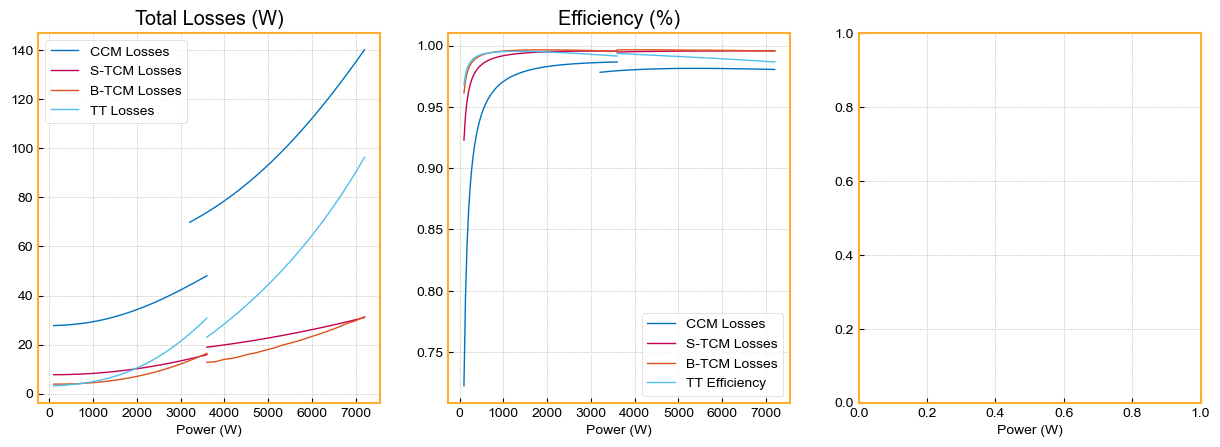

In [25]:
CCM["Total"] = CCM["Cond_T"]+CCM["Sw_T"]
CCM2x["Total"] = CCM2x["Cond_T"]+CCM2x["Sw_T"]
T_TCM["Total"] = T_TCM["Cond_T"]+T_TCM["Sw_T"]
T_TCM2x["Total"] = T_TCM2x["Cond_T"]+T_TCM2x["Sw_T"]

fig,p=plt.subplots(1,3)
fig.set_figwidth(15)
p[0].set_title('Total Losses (W)')
p[1].set_title('Efficiency (%)')

CCM["Eff"] = (CCM['P_arr']-CCM['Total'])/CCM["P_arr"]
CCM2x["Eff"] = (CCM2x['P_arr']-CCM2x['Total'])/CCM2x["P_arr"]
TCM["Eff"] =(TCM['P_arr']-TCM['Cond_T'])/TCM["P_arr"]
TCM2x["Eff"] =(TCM2x['P_arr']-TCM2x['Cond_T'])/TCM2x["P_arr"]
BTCM["Eff"] = (BTCM['P_arr']-BTCM['Cond_T'])/BTCM["P_arr"]
BTCM2x["Eff"] =(BTCM2x['P_arr']-BTCM2x['Cond_T'])/BTCM2x["P_arr"]
T_TCM["Eff"] = (T_TCM['P_arr']-T_TCM['Total'])/T_TCM["P_arr"]
T_TCM2x["Eff"] = (T_TCM2x['P_arr']-T_TCM2x['Total'])/T_TCM2x["P_arr"]

CCM.plot(ax=p[0],x="P_arr",y=["Total"],label=["CCM Losses"])
CCM2x.plot(ax=p[0],x="P_arr",y=["Total"],label=["CCM Losses"],color=['C0'],legend=False)
TCM.plot(ax=p[0],x="P_arr",y=["Cond_T"],label=["S-TCM Losses"],color='C2')
TCM2x.plot(ax=p[0],x="P_arr",y=["Cond_T"],label=["S-TCM Losses"],color='C2',legend=False)
BTCM.plot(ax=p[0],x="P_arr",y=["Cond_T"],label=["B-TCM Losses"],color='C5')
BTCM2x.plot(ax=p[0],x="P_arr",y=["Cond_T"],label=["B-TCM Losses"],color='C5',legend=False)
T_TCM.plot(ax=p[0],x="P_arr",y=["Cond_T"],label=["TT Losses"],color='C3')
T_TCM2x.plot(ax=p[0],x="P_arr",y=["Cond_T"],label=["TT Losses"],color='C3',legend=False)

CCM.plot(ax=p[1],x="P_arr",y=["Eff"],label=["CCM Losses"])
CCM2x.plot(ax=p[1],x="P_arr",y=["Eff"],label=["CCM Losses"],color=['C0'],legend=False)
TCM.plot(ax=p[1],x="P_arr",y=["Eff"],label=["S-TCM Losses"],color='C2')
TCM2x.plot(ax=p[1],x="P_arr",y=["Eff"],label=["S-TCM Losses"],color='C2',legend=False)
BTCM.plot(ax=p[1],x="P_arr",y=["Eff"],label=["B-TCM Losses"],color='C5')
BTCM2x.plot(ax=p[1],x="P_arr",y=["Eff"],label=["B-TCM Losses"],color='C5',legend=False)

T_TCM.plot(ax=p[1],x="P_arr",y=["Eff"],label=["TT Efficiency"],color='C3',legend=True)
T_TCM2x.plot(ax=p[1],x="P_arr",y=["Eff"],label=["TT Efficiency"],color='C3',legend=False)

[ax.set_xlabel("Power (W)") for ax in p]
print()
fig.savefig("efficiency.svg")

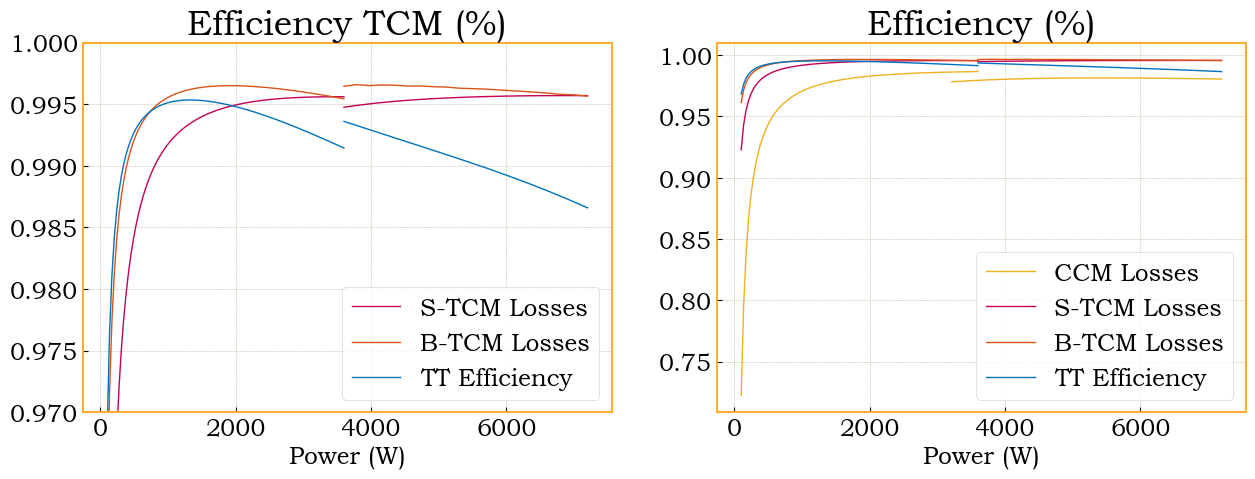

In [26]:
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.sans-serif'] = ['Bookman Old Style']  # Replace 'Arial' with your desired font
plt.rcParams['font.size'] = 17.5  # Example size

fig,p=plt.subplots(1,2)
fig.set_figwidth(15)
p[0].set_title('Efficiency TCM (%)')
p[1].set_title('Efficiency (%)')

TCM.plot(ax=p[0],x="P_arr",y=["Eff"],label=["S-TCM Losses"],color='C2')
TCM2x.plot(ax=p[0],x="P_arr",y=["Eff"],label=["S-TCM Losses"],color='C2',legend=False)
BTCM.plot(ax=p[0],x="P_arr",y=["Eff"],label=["B-TCM Losses"],color='C5')
BTCM2x.plot(ax=p[0],x="P_arr",y=["Eff"],label=["B-TCM Losses"],color='C5',legend=False)
T_TCM.plot(ax=p[0],x="P_arr",y=["Eff"],label=["TT Efficiency"],color='C0',legend=True)
T_TCM2x.plot(ax=p[0],x="P_arr",y=["Eff"],label=["TT Efficiency"],color='C0',legend=False)

CCM.plot(ax=p[1],x="P_arr",y=["Eff"],label=["CCM Losses"],color=['C1'])
CCM2x.plot(ax=p[1],x="P_arr",y=["Eff"],label=["CCM Losses"],color=['C1'],legend=False)
TCM.plot(ax=p[1],x="P_arr",y=["Eff"],label=["S-TCM Losses"],color='C2')
TCM2x.plot(ax=p[1],x="P_arr",y=["Eff"],label=["S-TCM Losses"],color='C2',legend=False)

BTCM.plot(ax=p[1],x="P_arr",y=["Eff"],label=["B-TCM Losses"],color='C5')
BTCM2x.plot(ax=p[1],x="P_arr",y=["Eff"],label=["B-TCM Losses"],color='C5',legend=False)
T_TCM.plot(ax=p[1],x="P_arr",y=["Eff"],label=["TT Efficiency"],color='C0',legend=True)
T_TCM2x.plot(ax=p[1],x="P_arr",y=["Eff"],label=["TT Efficiency"],color='C0',legend=False)
[ax.set_xlabel("Power (W)") for ax in p]
p[0].set_ylim(0.97,1.0)

fig.savefig("TCM_Efficiency.svg", format='svg')